# Sierpinski Triangle Via the Chaos Game

Create a Sierpinski Triangle by repeatedly navigating from the current point to halfway to a randomly selected corner of the triangle

https://en.wikipedia.org/wiki/Chaos_game

Website that can help you pick vertex coordinates for a polygon

https://www.mathopenref.com/coordpolycalc.html

In [321]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [322]:
class fractal(object):
    def __init__(self, vertices, starting_point):
        self.vertices = vertices
        self.starting_point = starting_point
        self.fractal_points = []
        
    def random_vertex(self):
        return rd.choice(self.vertices)

    def midpoint(self, vertex, x, y):
        vertex_x, vertex_y = vertex
        return ( (vertex_x+x)/2.0, (vertex_y+y)/2.0 )
        
    def build_fractal(self, iterations):
        '''The next vertex can be any random vertex'''
        for i in range(0, iterations):
            
            if i==0:
                start_x, start_y = self.starting_point
                self.fractal_points.append(self.midpoint(self.random_vertex(), start_x, start_y))
            else:
                last_x, last_y = self.fractal_points[-1]
                self.fractal_points.append(self.midpoint(self.random_vertex(), last_x, last_y))
    
    def build_fractal_restrict_single_history(self, iterations, restrictions=[]):
        '''
        The next vertex selected will not be part of the restrictions list
        example: a restriction of 1 will not allow for the selection of a vertex that has an index of one greater in fractal.vertices
        '''
        for i in range(0, iterations):
            
            if i==0:
                new_vertex = self.random_vertex()
                start_x, start_y = self.starting_point
                self.fractal_points.append(self.midpoint(new_vertex, start_x, start_y))
                
            else:
                #new_vertex = self.random_vertex()
                last_index = self.vertices.index(last_vertex) 
                temp_restrictions = list(restrictions)
                temp_vertices = list(self.vertices)
                
                temp_restrictions = [(restriction + last_index) % len(self.vertices) for restriction in temp_restrictions]                 
                temp_vertices = [vertex for idx, vertex in enumerate(temp_vertices) if idx not in temp_restrictions]
                
                new_vertex = rd.choice(temp_vertices)
                last_x, last_y = self.fractal_points[-1]
                self.fractal_points.append(self.midpoint(new_vertex, last_x, last_y))
             
            last_vertex = new_vertex
            
    def build_fractal_restrict_multiple_history(self, iterations, restrictions={}):
        '''
        The next vertex selected will not be contained in the restrictions dictionary
        example:
            dictionary: {0: [1],
                         1: [3]}
        
            The next vertex will not have an index one greater than the last index.
            The next vertex will not have an index three greater than the second to last index      
        '''      
        historic_vertices = []
        
        for i in range(0, iterations):
        
            # Build a history to the length of restrictions without plotting
            if i < len(restrictions):
                new_vertex = self.random_vertex()
                historic_vertices.insert(0, new_vertex)
                if i == 0:
                    start_x, start_y = self.starting_point
                else:
                    start_x, start_y = historic_vertices[-1]
                self.fractal_points.append(self.midpoint(new_vertex, start_x, start_y))
                

            else:
                # itterate through restrictions build a list of vertices that are possible to select from
                available_vertices_list = []
                for idx, single_restrictions in restrictions.items():

                    temp_restrictions = list(single_restrictions)
                    temp_vertices = list(self.vertices)
                    historic_vertex = historic_vertices[idx]
                    historic_vertex_index = self.vertices.index(historic_vertex)

                    temp_restrictions = [(restriction + historic_vertex_index) % len(self.vertices) for restriction in temp_restrictions]
                    available_vertices_list.append([vertex for idx, vertex in enumerate(temp_vertices) if idx not in temp_restrictions])

                available_vertices = list(set.intersection(*map(set, available_vertices_list)))
                
                new_vertex = rd.choice(available_vertices) 
                
                last_x, last_y = self.fractal_points[-1]
                self.fractal_points.append(self.midpoint(new_vertex, last_x, last_y))

                historic_vertices.insert(0, new_vertex)
                historic_vertices.pop()
                
        
    def plot_vertices(self):
        x = [point[0] for point in self.vertices]
        y = [point[1] for point in self.vertices]
        plt.scatter(x,y, s= 100, marker='s')
        plt.show()
        
    def plot_fractal(self):
        x = [point[0] for point in self.vertices]
        y = [point[1] for point in self.vertices]
        plt.scatter(x,y, s= 100, marker='s')
        
        fractal_points_x = [point[0] for point in self.fractal_points]
        fractal_points_y = [point[1] for point in self.fractal_points]
        plt.scatter(fractal_points_x, fractal_points_y, s=1, marker='.')
        
        plt.show()

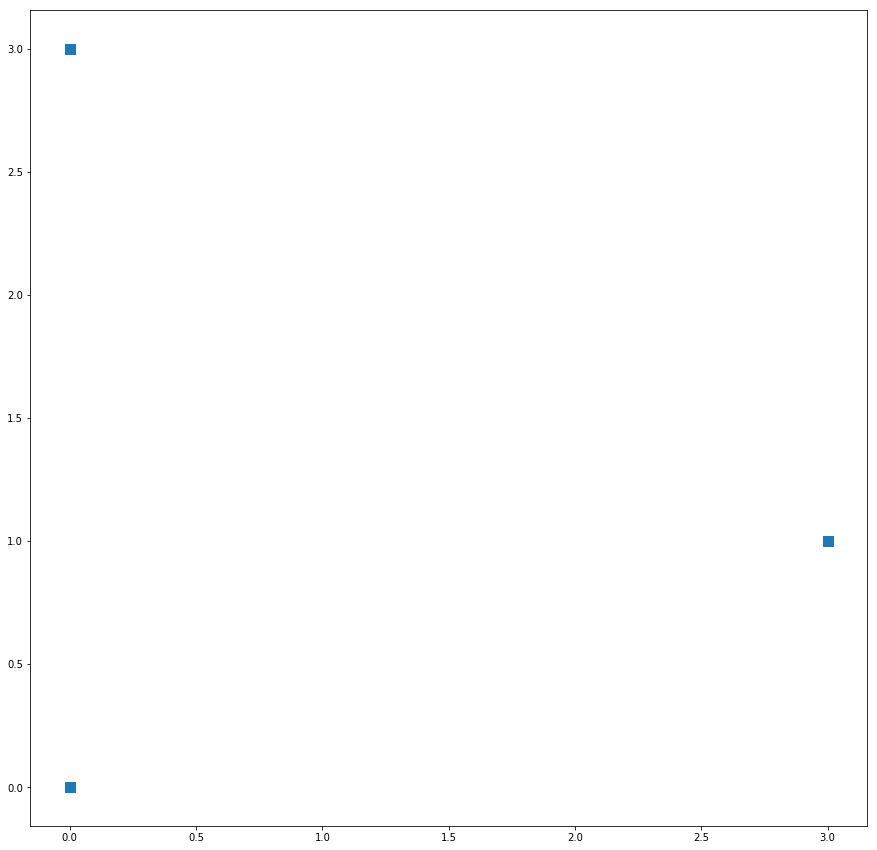

In [323]:
sierpinki_triangle = fractal(vertices=[[0,0], [3,1], [0,3]], starting_point=(1,1))
sierpinki_triangle.plot_vertices()

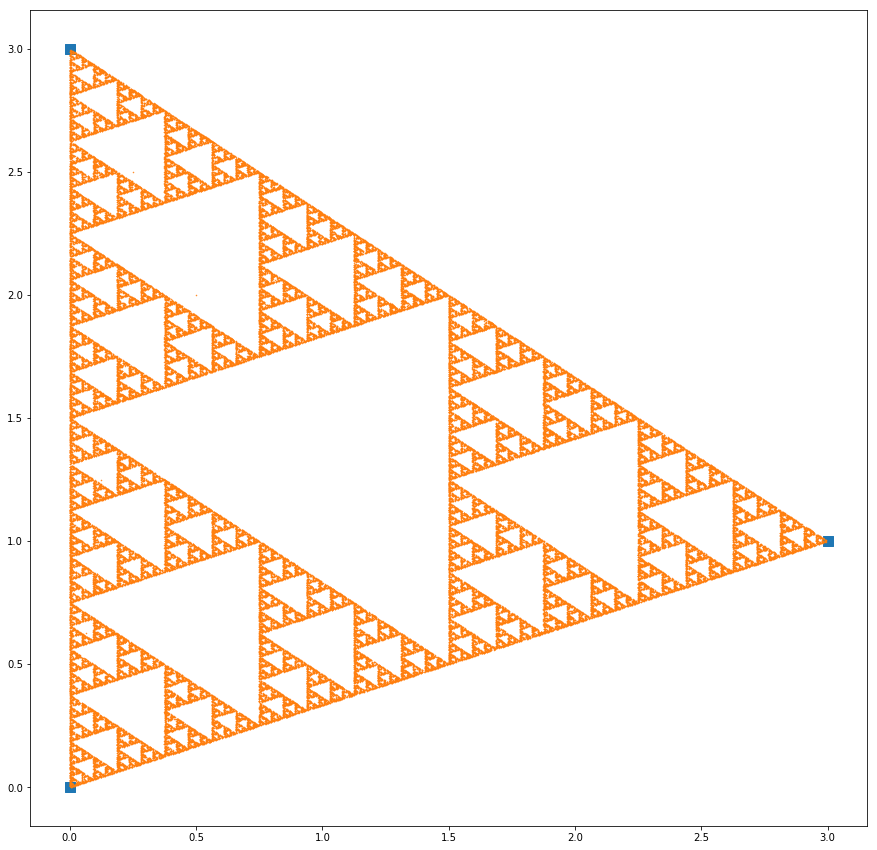

In [324]:
sierpinki_triangle.build_fractal(100000)
sierpinki_triangle.plot_fractal()

# What else can we create?

Lets try creating a fractal from 4 points configured in a square. However without any additional rules the sqaure should fill evenly with seemingly random points.

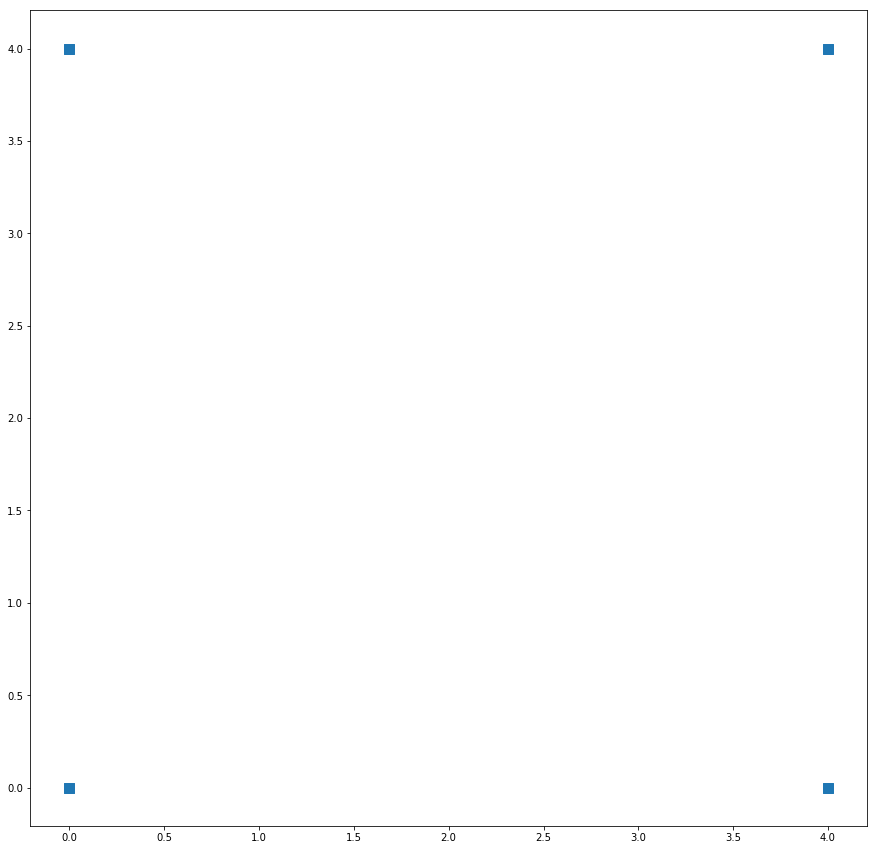

In [325]:
square_fractal = fractal(vertices=[(0,0), (0,4), (4,4), (4,0)], starting_point=(1,1))
square_fractal.plot_vertices()

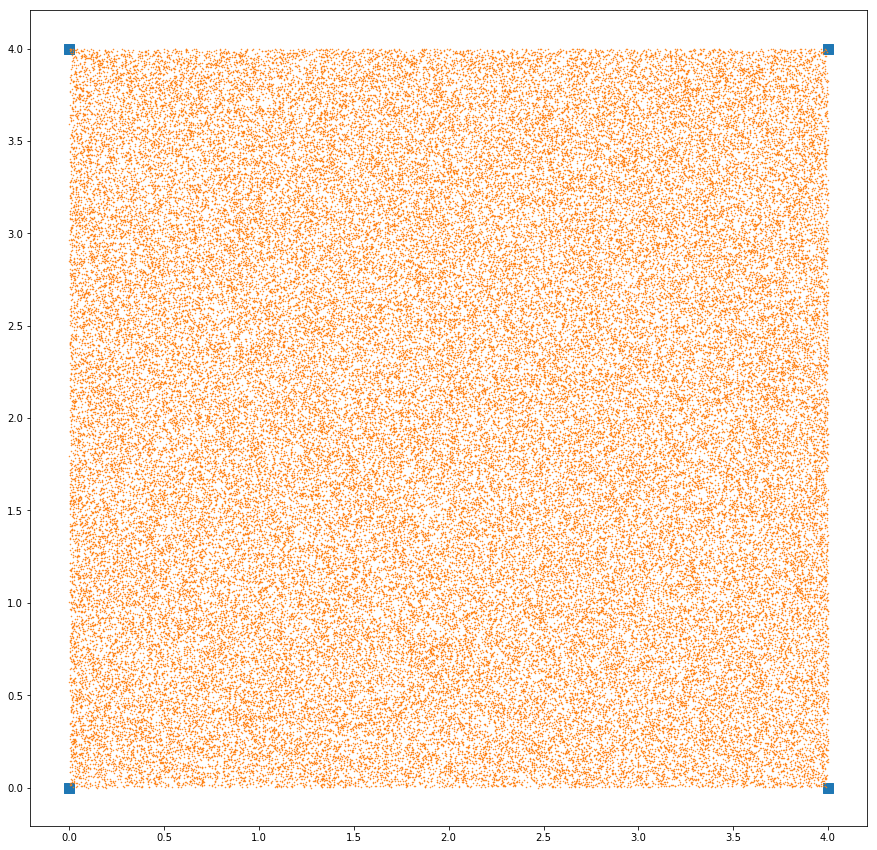

In [326]:
square_fractal.build_fractal(100000)
square_fractal.plot_fractal()

However, after adding in the rule that the same vertice can not be picked twice in a row a fractal should emerge.

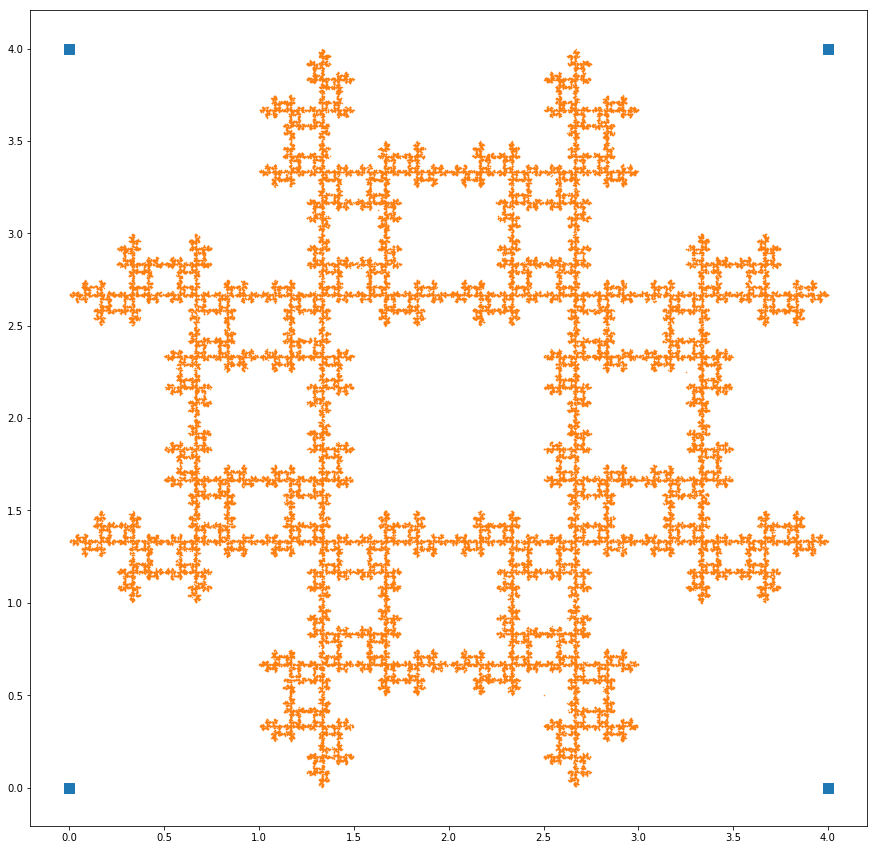

In [327]:
square_fractal_new_vertex = fractal(vertices=[(0,0), (0,4), (4,4), (4,0)], starting_point=(1,1))
square_fractal_new_vertex.build_fractal_restrict_single_history(100000, [0])
square_fractal_new_vertex.plot_fractal()

Also, adding the rule that the new vertex cannot be the vertex that is one clockwise from the last vertex produces this.

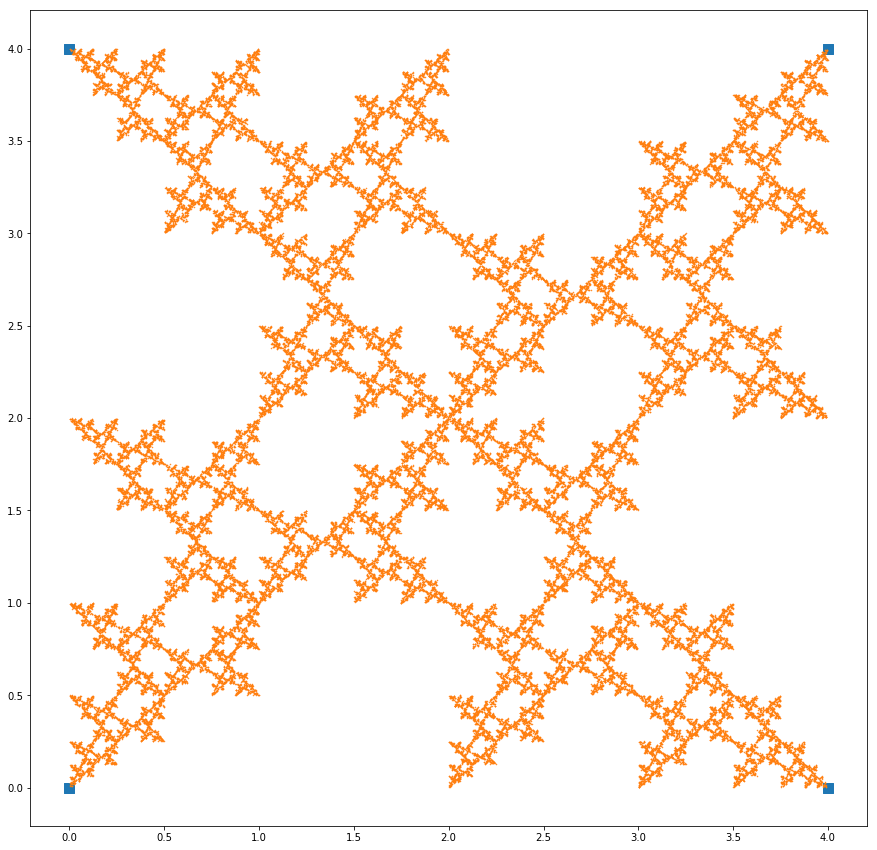

In [328]:
square_fractal_restricted_clockwise = fractal(vertices=[(0,0), (0,4), (4,4), (4,0)], starting_point=(1,1))
square_fractal_restricted_clockwise.build_fractal_restrict_single_history(100000, [1])
square_fractal_restricted_clockwise.plot_fractal()

Or adding the rule that the new vertex must be next to the last chosen vertex

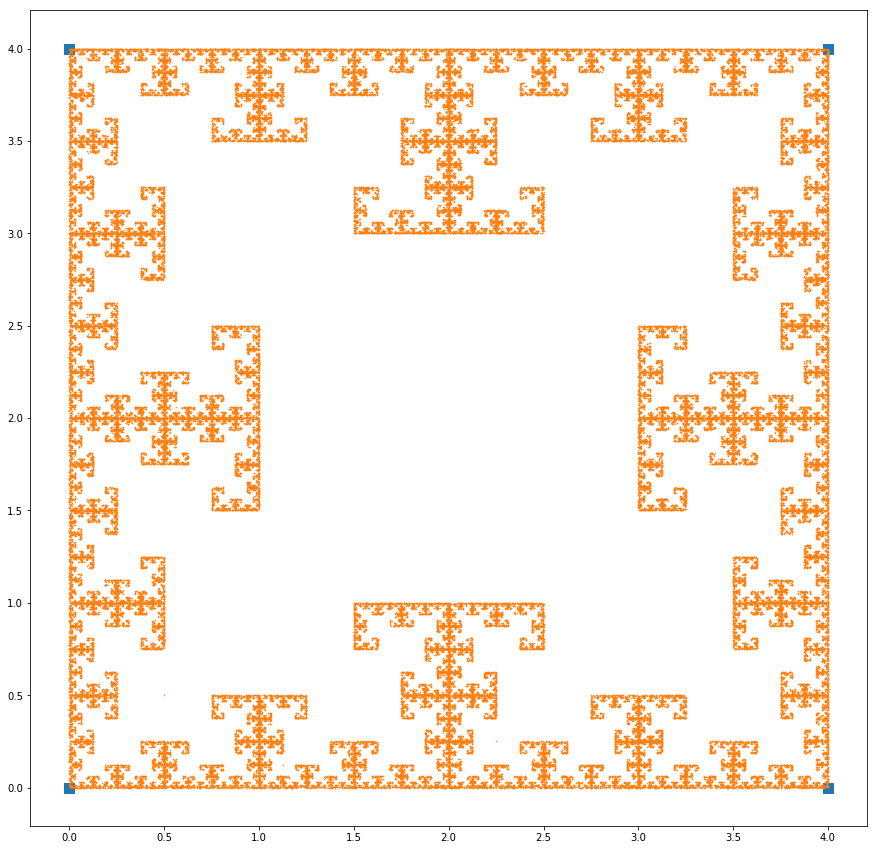

In [336]:
square_fractal_restricted_next_to = fractal(vertices=[(0,0), (0,4), (4,4), (4,0)], starting_point=(1,1))
square_fractal_restricted_next_to.build_fractal_restrict_single_history(100000, [2])
square_fractal_restricted_next_to.plot_fractal()

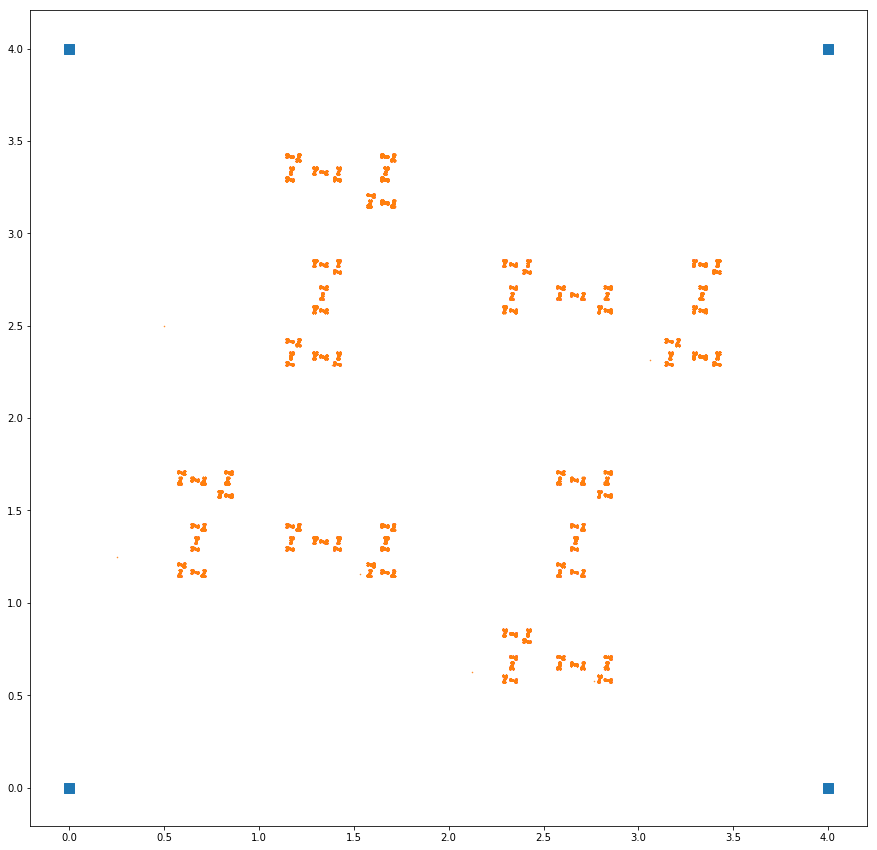

In [330]:
square_fractal_restricted_history_one_three = fractal(vertices=[(0,0), (0,4), (4,4), (4,0)], starting_point=(1,1))
square_fractal_restricted_history_one_three.build_fractal_restrict_single_history(100000, {0:[1], 1:[3]})
square_fractal_restricted_history_one_three.plot_fractal()

# Now with a Pentagon

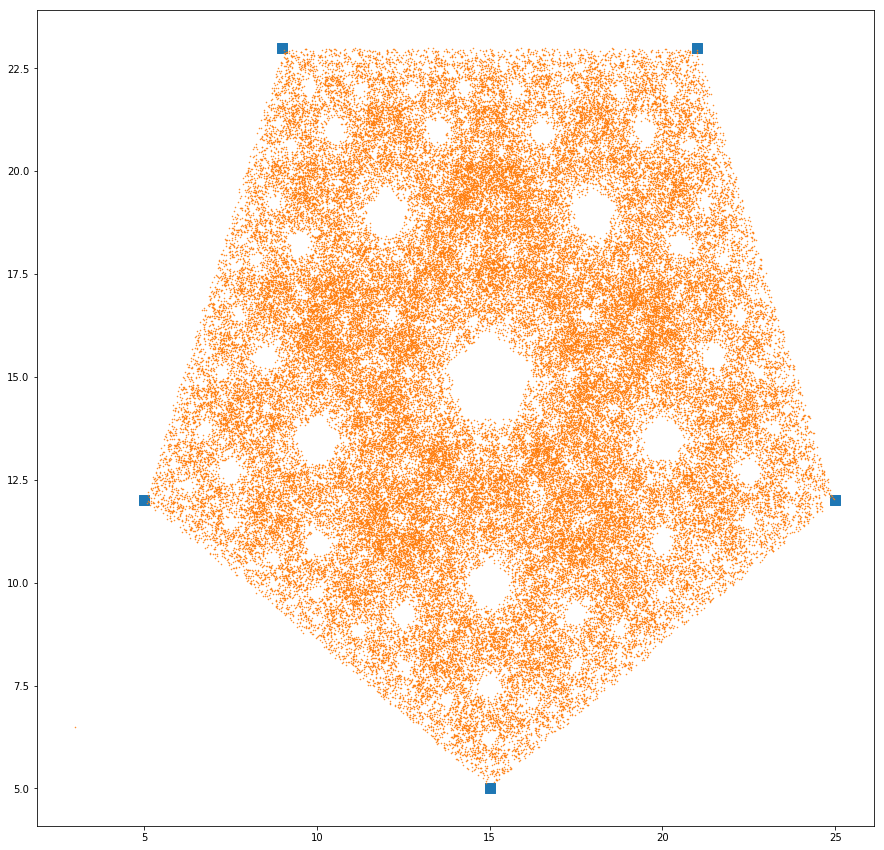

In [337]:
pentagon_fractal = fractal(vertices=[(15,5), (5,12), (9,23), (21,23), (25,12)], starting_point=(1,1))
pentagon_fractal.build_fractal(100000)
pentagon_fractal.plot_fractal()

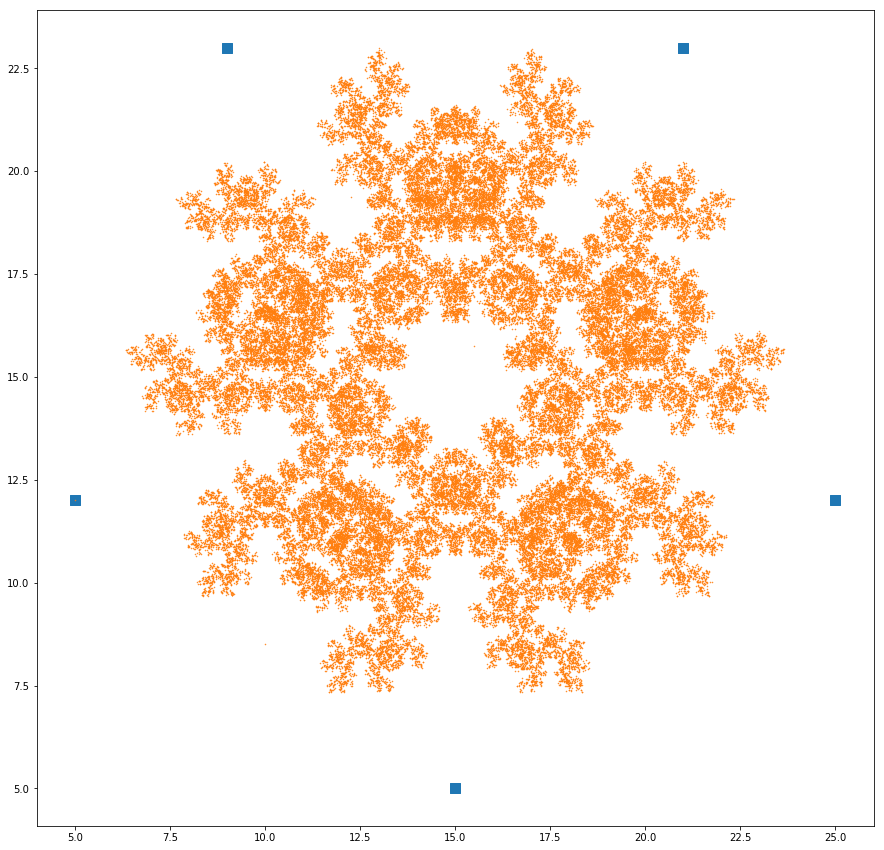

In [338]:
pentagon_fractal_restrict_new_vertex = fractal(vertices=[(15,5), (5,12), (9,23), (21,23), (25,12)], starting_point=(1,1))
pentagon_fractal_restrict_new_vertex.build_fractal_restrict_single_history(100000, [0])
pentagon_fractal_restrict_new_vertex.plot_fractal()

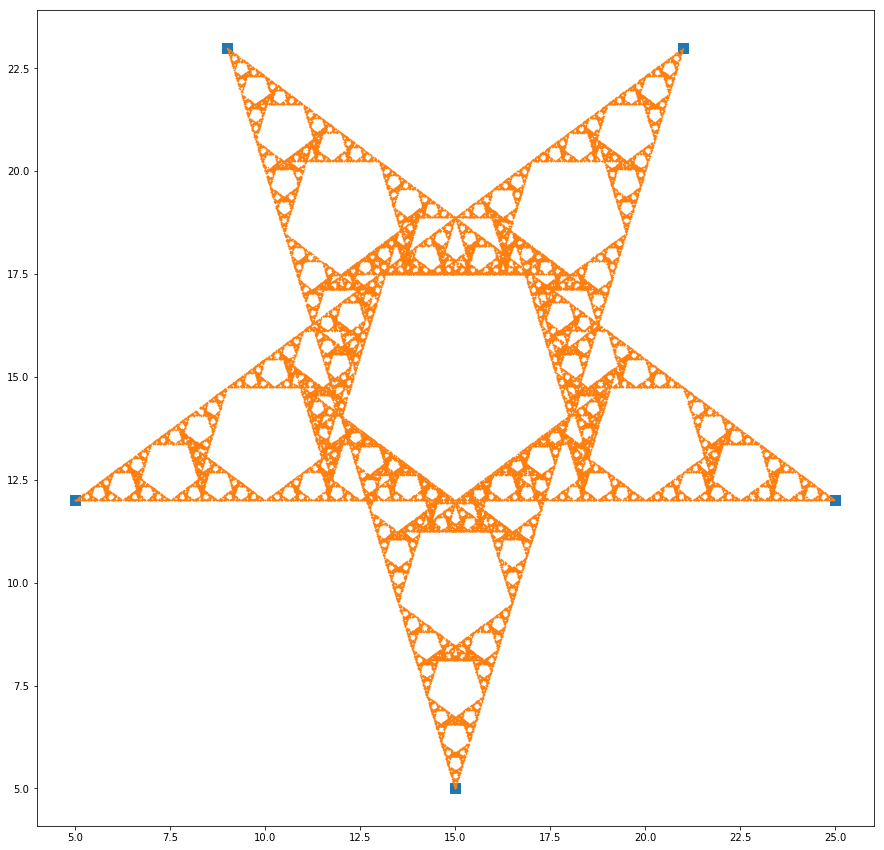

In [339]:
pentagon_fractal_restricted_single_history_one_four = fractal(vertices=[(15,5), (5,12), (9,23), (21,23), (25,12)], starting_point=(1,1))
pentagon_fractal_restricted_single_history_one_four.build_fractal_restrict_single_history(100000, [1,4])
pentagon_fractal_restricted_single_history_one_four.plot_fractal()

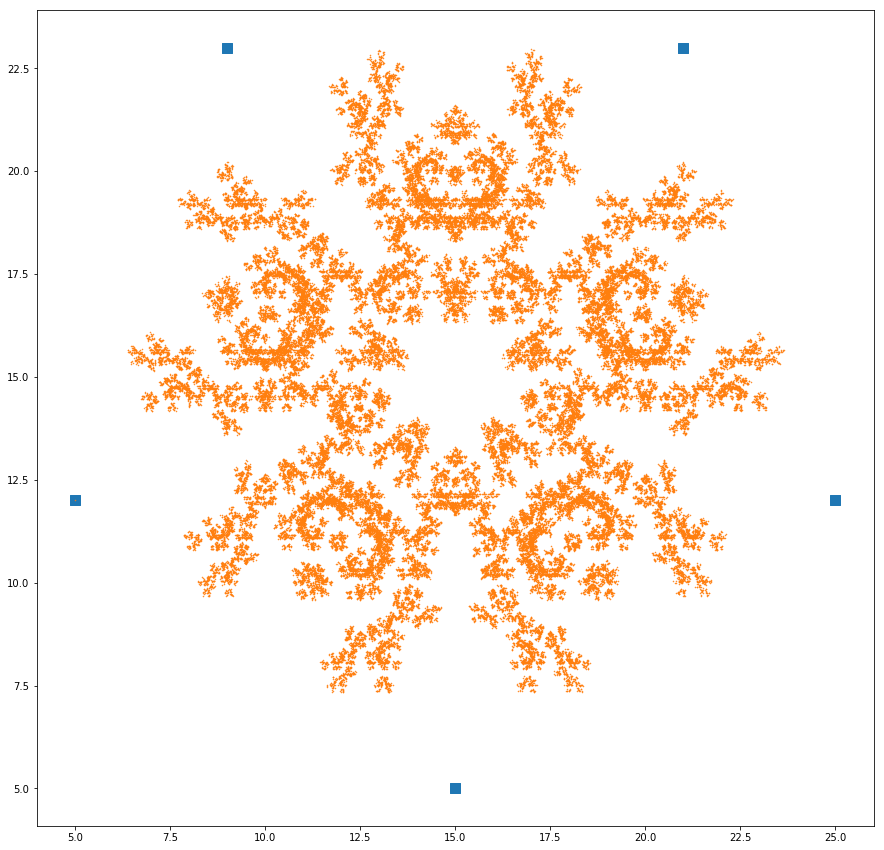

In [340]:
pentagon_fractal_restricted_multiple_history_one_four = fractal(vertices=[(15,5), (5,12), (9,23), (21,23), (25,12)], starting_point=(1,1))
pentagon_fractal_restricted_multiple_history_one_four.build_fractal_restrict_multiple_history(100000, {0:[0], 1:[], 2:[0]})
pentagon_fractal_restricted_multiple_history_one_four.plot_fractal()